## Utils for mupti-plots

앞서 `seaborn.relplot()` 의 `row` 와 `col` 에 변수를 입력함으로써 여러 개의 plots 을 한 번에 그리는 방법에 대하여 알아보았습니다. 이번에는 이 그림을 직접 그리는 방법에 대하여 알아봅니다. Seaborn 은 `FacetGrid` 와 `PairGrid` 라는 클래스를 제공합니다.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

### FacetGrid and map()

이번에도 tips dataset 을 이용합니다.

In [2]:
tips = sns.load_dataset("tips")
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


`seaborn.FacetGrid` 클래스는 첫번째 position argument 로 데이터셋을 입력받습니다. 그 뒤, col 을 데이터셋의 'time' 을 기준으로 나눌 것이라 명명합니다. `FacetGrid` instance 를 만들면 아래처럼 빈 grid plot 이 그려집니다.

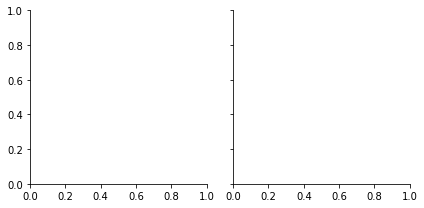

In [3]:
g = sns.FacetGrid(tips, col="time")

map 함수를 이용하여 각 subplot 을 그릴 함수를 첫번째로 입력하고, 뒤이어 그 함수들이 이용하는 변수 이름을 순서대로 입력합니다. `col` 을 'time' 으로 나누었으니, 시간대 별로 'tip' 의 histogram 이 그려집니다.

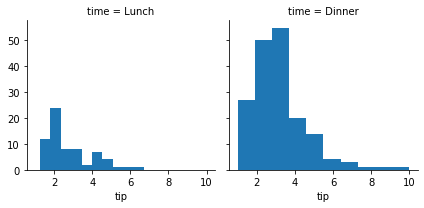

In [4]:
# sns.FacetGrid(data, row=None, col=None, ...)
g = sns.FacetGrid(tips, col="time")
g = g.map(plt.hist, "tip")

FacetGrid 는 `col` 설정이 가능하니 당연히 `row` 설정도 가능합니다. map 에는 첫번째 함수, 그 이후 position argument 로 그 함수가 이용하는 데이터셋 내의 변수명, 그 뒤로 plot 함수가 이용하는 argument 를 keyword argument 로 입력합니다. 함수로는 seaborn 의 함수도 이용이 가능합니다.

/home/lovit/anaconda3/envs/pytorch/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


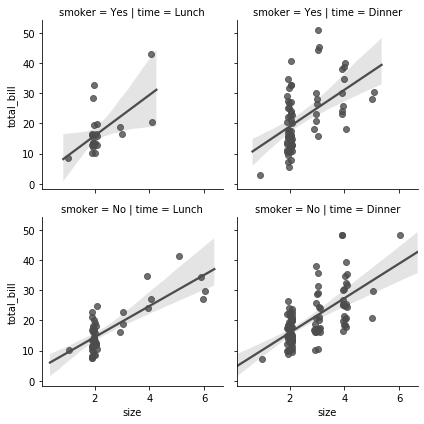

In [5]:
g = sns.FacetGrid(tips, row="smoker", col="time")
g = g.map(sns.regplot, "size", "total_bill", color=".3", x_jitter=.1)

그런데 각 subplot 의 조건이 너무 길게 표현됩니다. 이를 한 번만 표기하기 위해 `margin_titles=True` 로 설정합니다. 또한 추정 회귀선은 표현하지 않기 위해 `seaborn.regplot()` 의 `fit_reg=False` 로 설정합니다. 이처럼 subplot 을 그리는데 이용되는 arguments 를 입력할 수 있습니다.

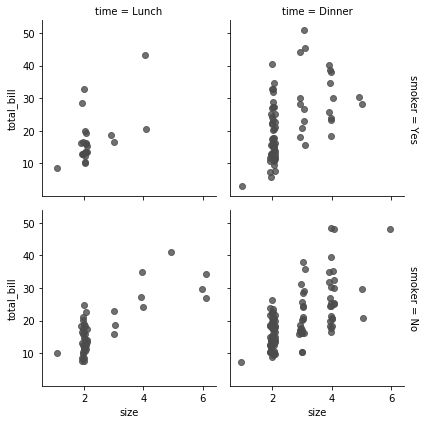

In [6]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g = g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

앞서서 `seaborn.relplot()` 을 이용하여 그렸던 fMRI 데이터의 subject 별 line plot 도 `FacetGrid` 를 이용하여 그릴 수 있습니다. 이 때 column 의 최대 개수나 column order 를 정의하는 부분은 FacetGrid 를 만들 때 모두 설정해야 합니다. `hue` 역시 이 때 미리 정의할 수 있습니다. 즉 앞서 `seaborn.relplot()` 을 그릴 때 `kind=line` 이고 `col` 에 변수가 입력되면 `relplot()` 함수 내에서 FacetGrid 를 만든 뒤, 각 subplots 을 그리는 것입니다.

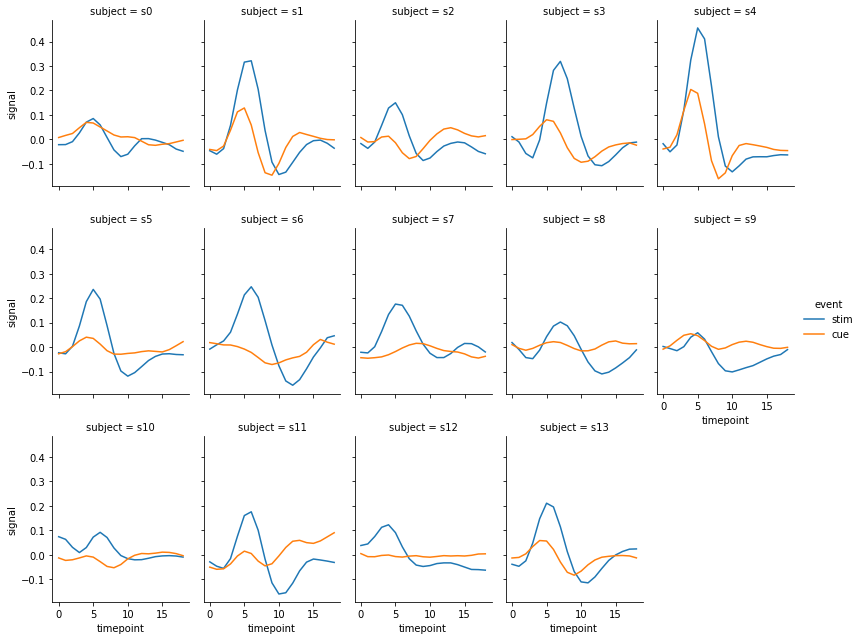

In [7]:
fmri = sns.load_dataset("fmri").query("region == 'frontal'")
col_order = [f's{i}' for i in range(14)]

g = sns.FacetGrid(fmri, col='subject', col_wrap=5, col_order=col_order, aspect=.75, height=3, hue='event')
g = g.map(sns.lineplot, 'timepoint', 'signal')
g = g.add_legend()

### Using custom functions

또한 사용자가 임의로 작성하는 함수를 FacetGrid 에 적용할 수도 있습니다. 아래는 quantile plot 을 그리는 함수를 만든 것입니다. `quantile_plot()` 함수는 x 변수를 입력받아 그 값을 정규분포로 fitting 한 뒤 이를 scatter plot 으로 표현합니다. `quantile_plot()` 함수는 하나의 변수만을 이용하니 `map` 함수에 'total_bill' 변수 이름만을 입력합니다.

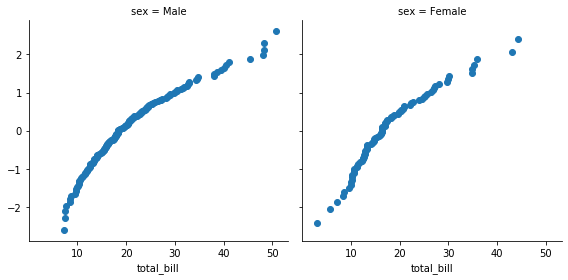

In [8]:
from scipy import stats

def quantile_plot(x, **kwargs):
    qntls, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, qntls, **kwargs)

g = sns.FacetGrid(tips, col="sex", height=4)
g = g.map(quantile_plot, "total_bill");

두 개의 변수를 이용하는 함수라면 `map` 함수에 두 개의 변수 이름을 입력하면 됩니다. 각 변수의 값들이 각각 `qqplot()` 의 `x` 와 `y` 로 입력됩니다.

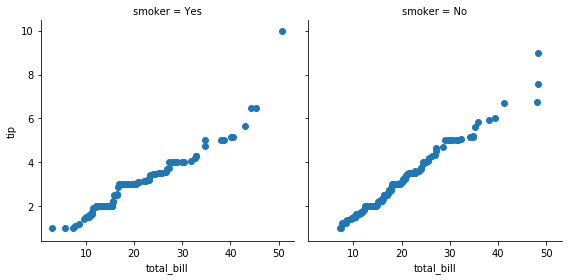

In [9]:
def qqplot(x, y, **kwargs):
    _, xr = stats.probplot(x, fit=False)
    _, yr = stats.probplot(y, fit=False)
    plt.scatter(xr, yr, **kwargs)

g = sns.FacetGrid(tips, col="smoker", height=4)
g = g.map(qqplot, "total_bill", "tip");

### Pairwise relationships in a dataset

데이터셋의 탐색을 위하여 연속형 변수 별 상관관계를 확인할 scatter plot 과 각 변수 별 histogram 을 그릴 수도 있습니다. 이를 위하여 iris 데이터를 이용합니다.

In [10]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


`seaborn.pairplot()` 함수를 이용하면 대각선에는 각 변수의 histogram 이, 그 외에는 두 연속형 변수 간의 상관관계가 scatter plot 으로 표현됩니다.

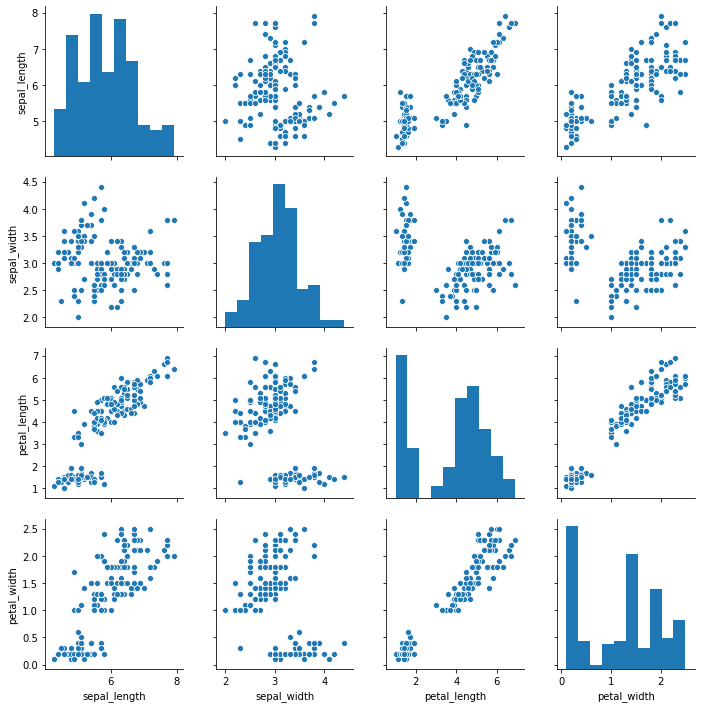

In [11]:
g = sns.pairplot(iris)

명목형 변수인 'species' 별로 색을 다르게 칠하기 위해서 `seaborn.pairplot()` 함수의 `hue` 에 변수 이름을 입력할 수 있습니다. 여러 종류의 species 에 대하여 histogram 을 그리기 어려우니 대각선의 subplots 에 밀도 추정 line plot 을 그렸습니다.

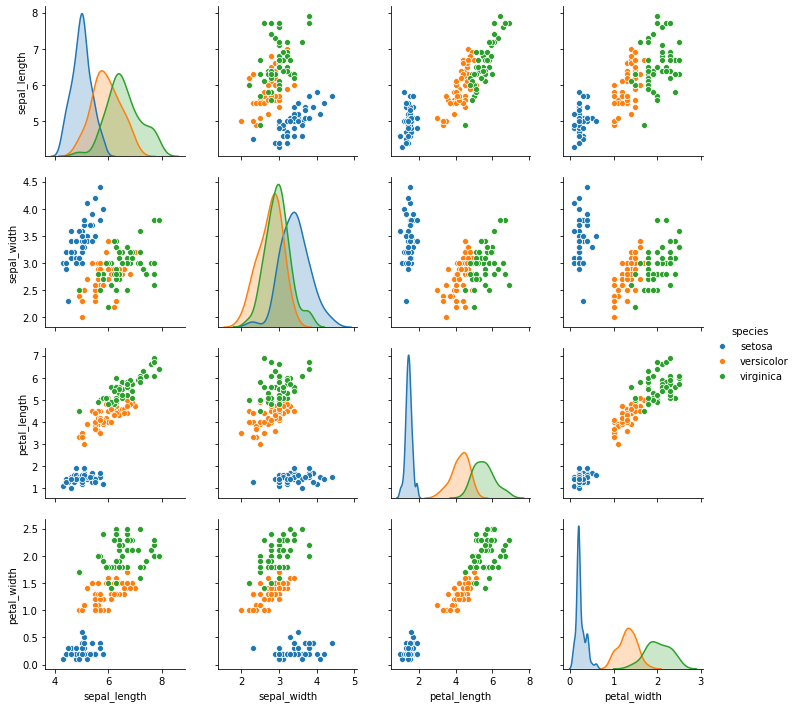

In [12]:
g = sns.pairplot(iris, hue="species")

만약 반드시 histogram 을 그리겠다면 `seaborn.pairplot()` 의 `diag_kind` 에 'hist' 를 입력합니다. seaborn==0.9.0 에서 지원되는 값은 'hist' 와 'kde' 뿐입니다. 그리고 diagonal subplots 을 그릴 때 이용하는 arguments 는 `diag_kws` 에 입력할 수 있습니다.

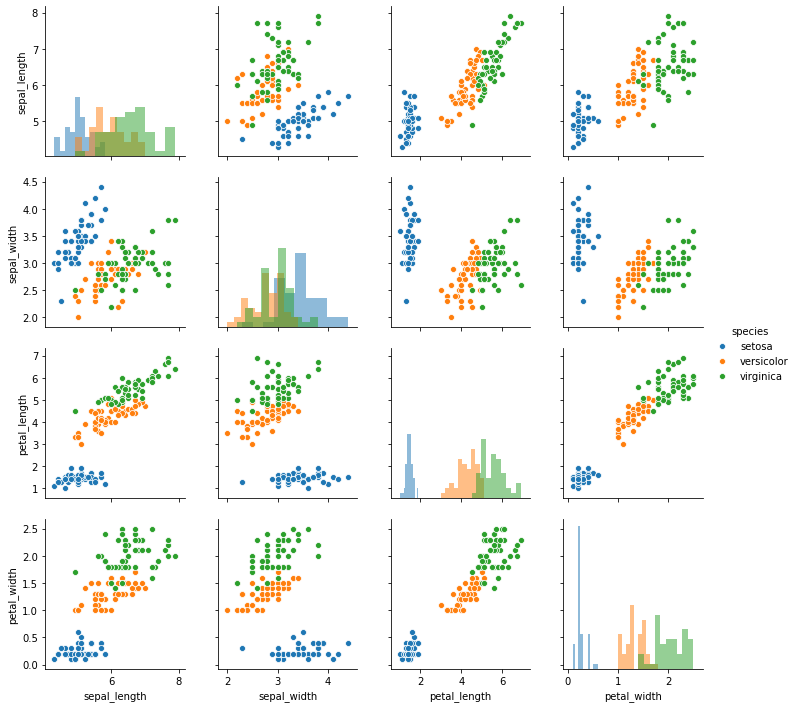

In [13]:
g = sns.pairplot(iris, hue="species", diag_kind="hist", height=2.5, diag_kws={'alpha':0.5})

이 역시 수작업으로 그릴 수 있습니다. 단, `seaborn.PairGrid` 는 변수 간 상관관계를 보이기 위한 그림이기 때문에 정방형의 grid plot 이 그려집니다. 그리고 대각선과 그 외에 각각 어떤 plot 을 그릴지 `map_diag()` 와 `map_offdiag()` 로 정의할 수 있습니다.

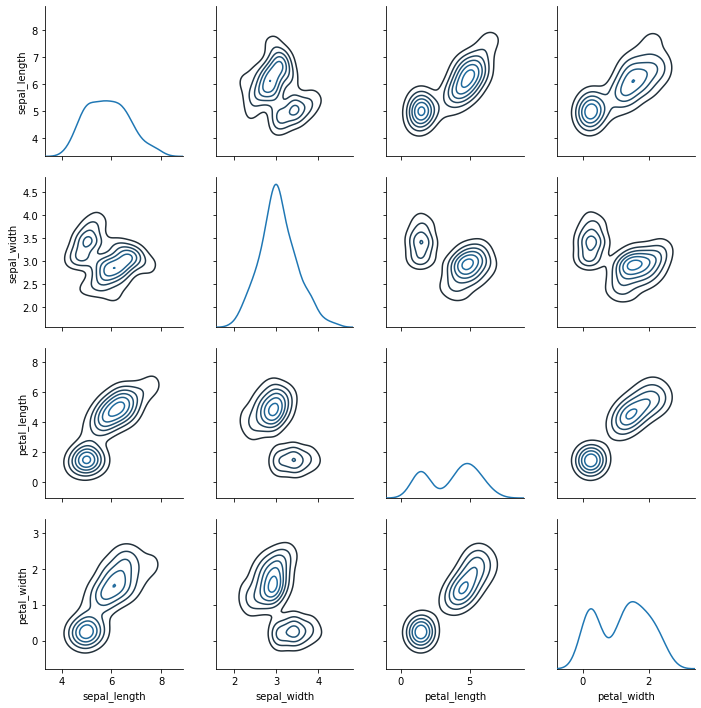

In [14]:
g = sns.PairGrid(iris)
g = g.map_diag(sns.kdeplot)
g = g.map_offdiag(sns.kdeplot, n_levels=6)

`map_diag()` 와 `map_offdiag()` 모두 각각의 plot 을 그리는데 필요한 arguments 를 keyword argument 형식으로 입력받습니다.

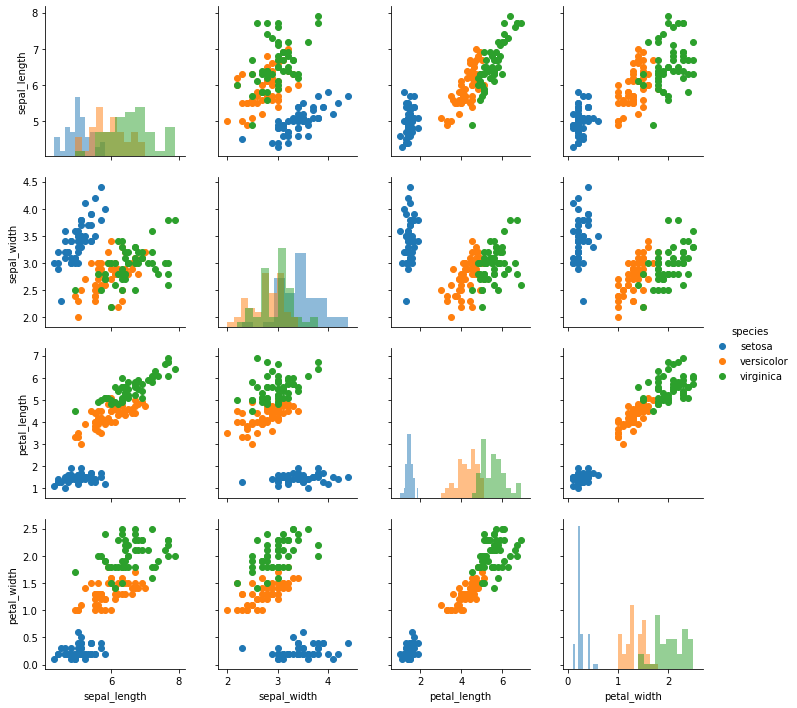

In [15]:
g = sns.PairGrid(iris, hue="species")
g = g.map_diag(plt.hist, alpha=0.5)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

혹은 대각선 위의 그림과 아래의 그림을 다르게 정의할 수도 있습니다. `lw` 는 line width 입니다.

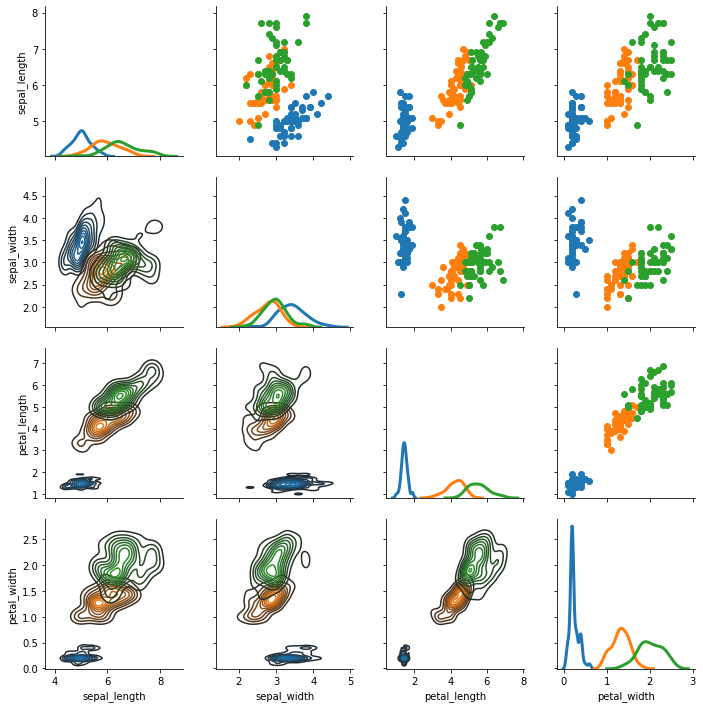

In [16]:
g = sns.PairGrid(iris, hue='species')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)
g = g.map_diag(sns.kdeplot, lw=3, legend=True)

만약 데이터셋의 변수가 10 개라면 10 x 10 크기의 grid plot 이 그려집니다. 확인할 변수가 있다면 그 변수 이름들만을 `seaborn.PairGrid` 의 argument `vars` 에 입력합니다.

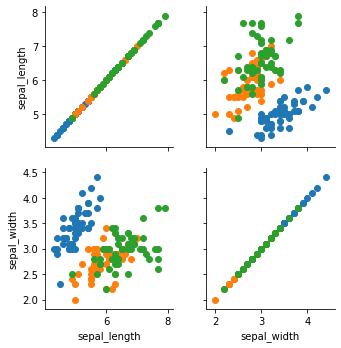

In [17]:
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width"], hue="species")
g = g.map(plt.scatter)